In [2]:
!pip install openvino-colab
import openvino_colab


  Preparing metadata (setup.py) ... done
  Created wheel for openvino-colab: filename=openvino_colab-3.1.4-py3-none-any.whl size=3651 sha256=34bd856ece9524c1b4aa47a5794a43958224bce3d5b1b23e1a55957a210a2c6a
  Stored in directory: /root/.cache/pip/wheels/ce/02/9f/66935be58a3fc0eafb633a6eed97f28624f509f6ea4cec9ee6
Successfully built openvino-colab
Installed OpenVINO Dependencies. Installing OpenVINO...
ENV Variables Set!
Please enter the Choice of framework you want to work with:

(Note: You should only install for the ones you would be using.
Incase of needing to install for more than one but not all, rerun this cell and 
install the pre-requisites one by one.)

1 tf
2 mxnet
3 onnx
4 kaldi
5 all
Please enter your choice (Default Option - 5): 5
Choice is 5.0 : all


Intel OpenVINO Installation Finished!


In [3]:
!git clone https://github.com/openvinotoolkit/open_model_zoo.git


Cloning into 'open_model_zoo'...
remote: Enumerating objects: 107116, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 107116 (delta 74), reused 37 (delta 35), pack-reused 106997 (from 2)
Receiving objects: 100% (107116/107116), 304.76 MiB | 31.84 MiB/s, done.
Resolving deltas: 100% (73243/73243), done.


In [4]:
%cd open_model_zoo/demos/gesture_recognition_demo/python


/content/open_model_zoo/demos/gesture_recognition_demo/python


In [5]:
!python3 ../../../tools/model_tools/downloader.py --list models.lst


################|| Downloading asl-recognition-0004 ||################

========== Downloading /content/open_model_zoo/demos/gesture_recognition_demo/python/intel/asl-recognition-0004/FP32/asl-recognition-0004.xml
... 100%, 212 KB, 739 KB/s, 0 seconds passed

========== Downloading /content/open_model_zoo/demos/gesture_recognition_demo/python/intel/asl-recognition-0004/FP32/asl-recognition-0004.bin
... 100%, 16243 KB, 16297 KB/s, 0 seconds passed

========== Downloading /content/open_model_zoo/demos/gesture_recognition_demo/python/intel/asl-recognition-0004/FP16/asl-recognition-0004.xml
... 100%, 300 KB, 1040 KB/s, 0 seconds passed

========== Downloading /content/open_model_zoo/demos/gesture_recognition_demo/python/intel/asl-recognition-0004/FP16/asl-recognition-0004.bin
... 100%, 8121 KB, 10539 KB/s, 0 seconds passed

========== Downloading /content/open_model_zoo/demos/gesture_recognition_demo/python/intel/asl-recognition-0004/FP16-INT8/asl-recognition-0004.xml
... 100%, 610 KB, 157

In [8]:
!pip install openvino-dev


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 3.1 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-c

In [9]:
import openvino
print(openvino.__version__)


2024.6.0-17404-4c0f47d2335-releases/2024/6


In [10]:
!python3 gesture_recognition_demo.py \
    -m_a ../../../models/intel/common-sign-language-0002/FP16/common-sign-language-0002.xml \
    -m_d ../../../models/intel/person-detection-asl-0001/FP16/person-detection-asl-0001.xml \
    -i 0 \
    -c ../../../data/dataset_classes/common_sign_language12.json


Traceback (most recent call last):
  File "/content/open_model_zoo/demos/gesture_recognition_demo/python/gesture_recognition_demo.py", line 257, in <module>
    multiprocessing.set_start_method('spawn')
  File "/usr/lib/python3.11/multiprocessing/context.py", line 247, in set_start_method
    raise RuntimeError('context has already been set')
RuntimeError: context has already been set


In [15]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 24.9 MB/s eta 0:00:00


In [16]:
!wget -q https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task

In [17]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Hands and Drawing modules
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Define a function to recognize gestures based on landmarks
def recognize_gesture(landmarks):
    # Example: Recognize 'thumbs up' gesture
    thumb_tip = landmarks[mp_hands.HandLandmark.THUMB_TIP].y
    thumb_ip = landmarks[mp_hands.HandLandmark.THUMB_IP].y
    index_mcp = landmarks[mp_hands.HandLandmark.INDEX_FINGER_MCP].y

    if thumb_tip < thumb_ip < index_mcp:
        return "Thumbs Up"
    else:
        return "Unknown Gesture"

# Initialize webcam
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Process the image and detect hands
        results = hands.process(image)

        # Draw hand landmarks and recognize gestures
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                gesture = recognize_gesture(hand_landmarks.landmark)
                cv2.putText(image, gesture, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        # Display the image
        cv2.imshow('Gesture Recognition', image)

        if cv2.waitKey(5) & 0xFF == 27:
            break

cap.release()
cv2.destroyAllWindows()


In [21]:
import cv2

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    ret, frame = cap.read()
    if ret:
        cv2.imshow('Webcam Test', frame)
        cv2.waitKey(0)
    else:
        print("Error: Could not read frame.")
cap.release()
cv2.destroyAllWindows()


Error: Could not open webcam.


In [24]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


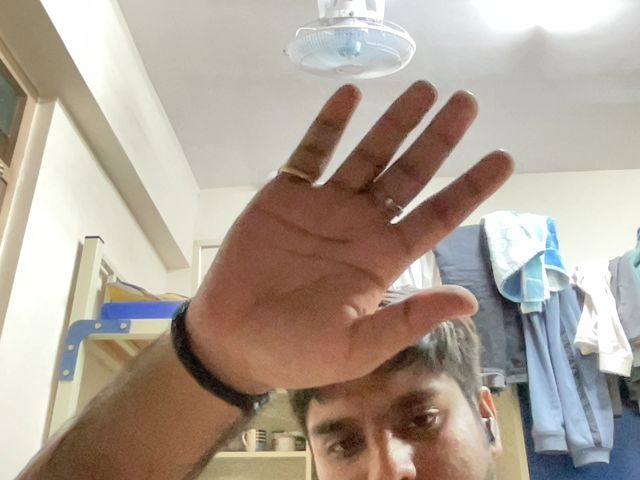

In [35]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [26]:
import cv2

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture image.")
        break

    cv2.imshow('Webcam Feed', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [27]:
cap = cv2.VideoCapture(1)


In [29]:
!pip uninstall opencv-python
!pip install opencv-python

Found existing installation: opencv-python 4.11.0.86
Uninstalling opencv-python-4.11.0.86:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/cv2/*
    /usr/local/lib/python3.11/dist-packages/opencv_python-4.11.0.86.dist-info/*
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Core-e7f476e2.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Gui-1ce8cbfe.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Test-9ac3ed15.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Widgets-cd430389.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5XcbQpa-b18b5a78.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libX11-xcb-0e257303.so.1.0.0
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libavcodec-76c43bf0.so.59.37.100
    /usr/loca

In [30]:
pip show mediapipe


Name: mediapipe
Version: 0.10.21
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, attrs, flatbuffers, jax, jaxlib, matplotlib, numpy, opencv-contrib-python, protobuf, sentencepiece, sounddevice
Required-by: 


In [31]:
pip install mediapipe


In [32]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Hands.
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Initialize webcam.
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture image.")
            break

        # Flip the frame horizontally for a later selfie-view display.
        frame = cv2.flip(frame, 1)

        # Convert the BGR image to RGB.
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the RGB image to detect hands.
        results = hands.process(image_rgb)

        # Draw hand landmarks on the frame.
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        else:
            print("No hands detected.")

        # Display the frame.
        cv2.imshow('Hand Landmarks', frame)

        if cv2.waitKey(5) & 0xFF == 27:  # Press 'Esc' to exit.
            break

cap.release()
cv2.destroyAllWindows()


In [33]:
pip install --upgrade mediapipe opencv-python


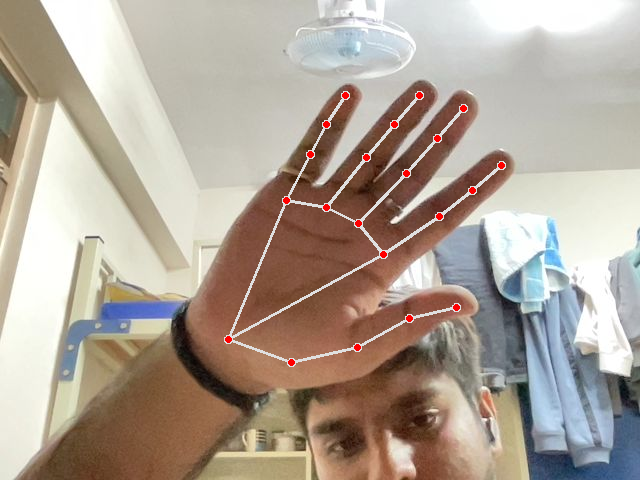

In [36]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Hands.
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Load the captured image.
image = cv2.imread(filename)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image to detect hands.
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    results = hands.process(image_rgb)

    # Draw hand landmarks on the image.
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    else:
        print("No hands detected.")

# Display the image with landmarks.
from google.colab.patches import cv2_imshow
cv2_imshow(image)


In [37]:
!pip install opencv-python-headless
!pip install matplotlib


In [38]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from matplotlib import pyplot as plt

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            const dataUrl = canvas.toDataURL('image/jpeg', quality);
            div.remove();
            return dataUrl;
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


In [42]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from matplotlib import pyplot as plt

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            const dataUrl = canvas.toDataURL('image/jpeg', quality);
            div.remove();
            return dataUrl;
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


In [44]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


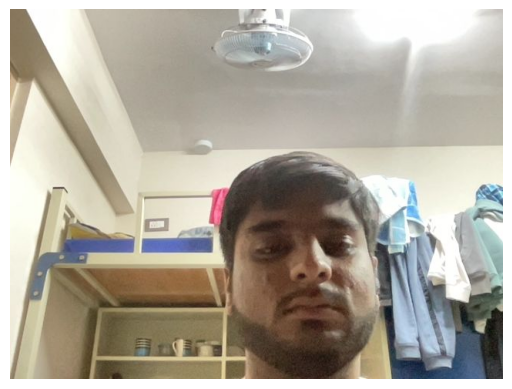

In [49]:
try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Display the captured image
    img = cv2.imread(filename)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
except Exception as e:
    print(str(e))


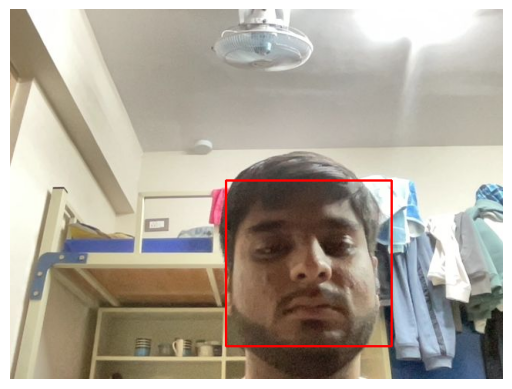

In [50]:
# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the output
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [51]:
pip install opencv-python mediapipe pyautogui


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyautogui: filename=pyautogui-0.9.54-py3-none-any.whl size=37631 sha256=e8f3d1615d87c574d74fd17c6c0f816e3493a9c99f173d62e296b

In [55]:
import os
os.environ['DISPLAY'] = ':0'



In [57]:
!sudo apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 29 not upgraded.
Need to get 7,814 kB of archives.
After this operation, 12.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [60]:
ls /content/open_model_zoo/demos/gesture_recognition_demo/python/


gesture_recognition_demo/     gesture_recognition.gif  intel/      photo.jpg  README.md
gesture_recognition_demo.py*  gesture_recognizer.task  models.lst  public/


In [61]:
cd /content/open_model_zoo/demos/gesture_recognition_demo/python/


/content/open_model_zoo/demos/gesture_recognition_demo/python


In [66]:
import sys
from unittest import mock

sys.modules['pyautogui'] = mock.MagicMock()


In [68]:
!ssh -X user@hostname

ssh: Could not resolve hostname hostname: Name or service not known


In [72]:
! git clone https://github.com/LuminaX-alt/Vino.ai.git

Cloning into 'Vino.ai'...
